In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Cholesky factorization</h1>

<span style="color:red">**Theorem**</span> Let $A\in \mathbb{R}^{n\times n}$ be symmetric ($A=A^T$) and positive definite ($x^TAx\ge 0\  \forall\  x\neq0$), than there exists a unique factorization such that $A = \hat L\hat L^T$, where $\hat L$ is non singular and has positive terms on the diagonal.

<span style="color:orange">N.B.</span> A is non singular and has all terms on the diagonal and all eigenvalues strictly positive

### Algorithm

In [2]:
def cholesky_factorization(A: np.array) -> np.array:
    """
    Computes the Cholesky factorization of a symmetric and positive definite matrix
    
    Parameters:
        A (numpy array): nxn symmetric and positive definite matrix
        
    Returns:
        L (numpy array): nxn lower triangular matrix such that A = LL.T
    """
    
    # Matrix dimensions
    n = A.shape[0]
    
    # Inizialization of L
    L = np.zeros((n, n))
    
    #Algorithm
    for j in range(n):
        L[j][j] = np.sqrt(A[j][j] - np.dot(L[j][:j + 1], L[j][:j + 1]))
        
        for i in range(j + 1, n):
            L[i][j] = (A[i][j] - np.sum(L[i][:i + 1] * L[j][:i + 1])) / L[j][j]

    return L

In [3]:
# Input matrix
n = 3
A = np.random.randint(0, 20, (n, n))
A = np.dot(A, A.T)

print(f'A = \n{A}\n')

# Decomposition
L = cholesky_factorization(A)

print(f'L = \n{L}\n')
print(f'LL^T = \n{np.dot(L, L.T)}\n')

# Linear system
b = np.random.randint(1, 10, (n ,1))

# Ly = b
y = np.linalg.solve(L, b)

# L^Tx = y
x = np.linalg.solve(L.T, y)

print(f'Solution: x = \n{x}\n')
print(f'Residual: r = \n{np.dot(A, x) - b}\n') 

A = 
[[205 169  86]
 [169 170  40]
 [ 86  40 300]]

L = 
[[14.31782106  0.          0.        ]
 [11.803472    5.53877683  0.        ]
 [ 6.00650054 -5.57840872 15.25789328]]

LL^T = 
[[205. 169.  86.]
 [169. 170.  40.]
 [ 86.  40. 300.]]

Solution: x = 
[[-0.17457824]
 [ 0.20709651]
 [ 0.03243289]]

Residual: r = 
[[ 3.10862447e-15]
 [-4.44089210e-15]
 [ 0.00000000e+00]]



<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Banded systems</h1>

A matrix $A\in \mathbb{R}^{n\times n}$ is said to be banded with lower band $b_L$ and upper band $b_U$ if if $A_{ij} = 0$ when $i>j+b_L$ and when $i <j-b_U$.

<span style="color:orange">Proposition</span> If A is banded then the decomposition $A=LU$ has the same structure.

## Thomas algorithm

In [4]:
def thomas_algorithm(a: np.array, b: np.array, c: np.array) -> [np.array, np.array]:
    """
    Performs the LU decomposition for a tridiagonal matrix
    
    Parameters:
        a (numpy array): nxn vector -> diagonal of A
        b (numpy array): n-1xn-1 vector -> lower diagonal of A
        c (numpy array): n-1xn-1 vector -> upper diagonal of A
        
    Returns:
        L (numpy array): nxn lower triangular matrix
        U (numpy array): nxn upper triangular matrix
    """
    
    # Matrix dimensions
    n = a.shape[0]
    
    # Initialization of the non vanishing terms of L and U
    alpha = np.zeros(n)
    beta = np.zeros(n)
    gamma = c
    
    # First element
    alpha[0] = a[0]
    
    # Algorithm
    for i in range(1, n):
        beta[i] = b[i - 1] / alpha[i - 1]
        alpha[i] = a[i] - beta[i] * c[i - 1]
    
    # In the previous algorithm beta had an extra element just to avoid complications with the indices
    beta = beta[1:]
    
    # Explicit form of L and U (this could be avoided, as it occupies memory)
    L = np.eye(n) + np.diag(beta, k = -1)
    U = np.diag(alpha) + np.diag(gamma, k = 1)
    
    return L, U

In [5]:
# Thomas algorithm for a tridiagonal matrix

# Input matrix
n = 5
a = np.random.randint(1, 10, (n,))
b = np.random.randint(1, 10, (n - 1,))
c = np.random.randint(1, 10, (n - 1,))

A = np.diag(a) + np.diag(b, k = -1) + np.diag(c, k = 1)

print(f'A = \n{A}\n')

# Linear system
known_term = np.random.randint(1, 10, (n,1))

# Decomposition
L, U = thomas_algorithm(a, b, c)

# Ly = b
y = np.linalg.solve(L, known_term)

# Ux = y
x = np.linalg.solve(U, y)

print(f'L = \n{L}\n')
print(f'U = \n{U}\n')
print(f'LU = \n{np.dot(L, U)}\n')

print(f'Solution: x = \n{x}\n')
print(f'Residual: r = \n{np.dot(A, x) - known_term}\n') 

A = 
[[2 4 0 0 0]
 [9 3 4 0 0]
 [0 6 8 1 0]
 [0 0 2 9 3]
 [0 0 0 7 2]]

L = 
[[ 1.          0.          0.          0.          0.        ]
 [ 4.5         1.          0.          0.          0.        ]
 [ 0.         -0.4         1.          0.          0.        ]
 [ 0.          0.          0.20833333  1.          0.        ]
 [ 0.          0.          0.          0.79620853  1.        ]]

U = 
[[  2.           4.           0.           0.           0.        ]
 [  0.         -15.           4.           0.           0.        ]
 [  0.           0.           9.6          1.           0.        ]
 [  0.           0.           0.           8.79166667   3.        ]
 [  0.           0.           0.           0.          -0.38862559]]

LU = 
[[2. 4. 0. 0. 0.]
 [9. 3. 4. 0. 0.]
 [0. 6. 8. 1. 0.]
 [0. 0. 2. 9. 3.]
 [0. 0. 0. 7. 2.]]

Solution: x = 
[[ -0.0203252 ]
 [  0.7601626 ]
 [ -0.27439024]
 [  6.63414634]
 [-18.7195122 ]]

Residual: r = 
[[0.00000000e+00]
 [8.88178420e-16]
 [0.00000000e

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Banded systems for ODEs</h1>

Solve numerically the equation $$ u''(x) = -\pi^2\sin(\pi x),\ \ x\in[0,1]$$

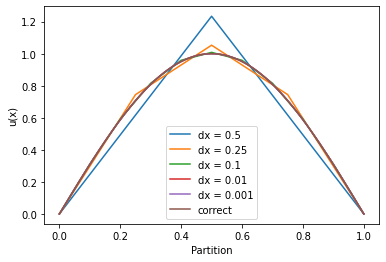

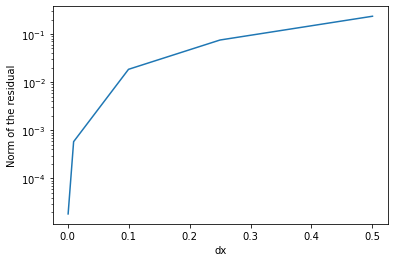

In [6]:
# Known function
func = lambda x: -np.pi**2 * np.sin(np.pi*x)

# x range
x_range = [0, 1]

# Dict to keep tracks of the residuals
residuals = {}

# Algorithm for different values of dx
for dx in [0.5, 0.25, 0.1, 0.01, 0.001]:
    #dx = 10**(-i)
    
    # Evenly spaced values in x_range at intervals dx
    partition = np.arange(x_range[0], x_range[1], dx)
    
    # Deletes the first element 
    partition = np.delete(partition, 0)
    
    ### Definition of the linear system
    n = len(partition)

    a = np.ones(n)*-2
    b = np.ones(n-1)

    # Known function calculated in the points of the partition
    f = np.array([func(x) for x in partition])

    ### Solution of the linear system

    # Decomposition
    L, U = thomas_algorithm(a, b, b)

    # Ly = b
    y = np.linalg.solve(L/(dx**2), f)

    # Ux = y
    u = np.linalg.solve(U, y)

    ### Manual insertion of the boundary conditions
    
    # Inserts extremes of the partitions
    partition = np.insert(partition, 0, 0)
    partition = np.insert(partition, len(partition), 1)
    
    # u(0) = u(1) = 0
    u = np.insert(u, 0, 0)
    u = np.insert(u, len(u), 0)

    # Plot of the resulting u as a function of dx
    plt.plot(partition, u, label=f'dx = {dx}')
    
    # Analytical solution found by hand
    analytical_sol = np.sin(np.pi*np.linspace(0, 1, num=len(partition), endpoint=True))
    
    # Calculates the difference from the analytical solution
    residual = np.linalg.norm(analytical_sol - u)
    residuals[dx] = residual

plt.plot(partition, analytical_sol, label='correct')
plt.xlabel('Partition')
plt.ylabel('u(x)')
plt.legend()
plt.show()

# plot error as a function of dx comparing with analitycal solution
plt.semilogy(residuals.keys(), residuals.values())
plt.xlabel('dx')
plt.ylabel('Norm of the residual')
plt.show()

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Generalization to two dimensions</h1>

Solve numerically the equation $$ -\nabla^2 u(x, y) = \sin(\pi x)\sin(\pi y),\ \ (x,y)\in[0,1]\times[0,1]$$

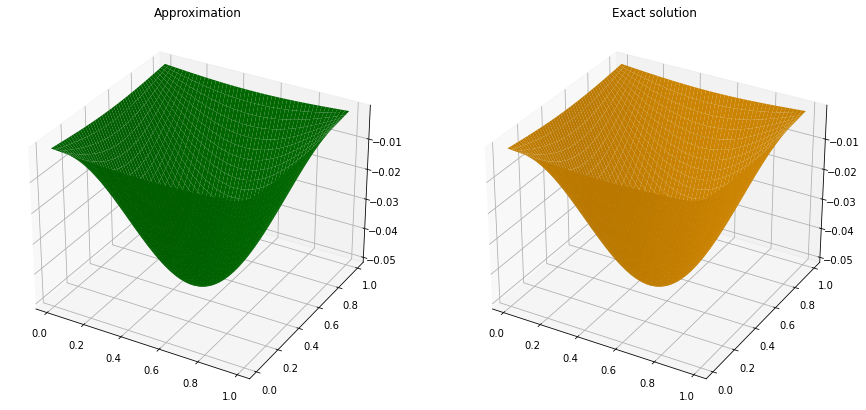

In [7]:
# Known function
func = lambda x, y: np.sin(np.pi*x)*np.sin(np.pi*y)
sol = lambda x, y: -1/2/np.pi**2 * np.sin(np.pi*x)*np.sin(np.pi*y) 

# Dominion
dom = [0, 1]

# Discrete interval
dx = .01

# 2D partition
partition = np.arange(dom[0], dom[1]+dx, dx)
X, Y = np.meshgrid(partition[1:-1], partition[1:-1])

# Matrix for the linear system
n = len(partition) - 2
A = np.eye(n**2)*-4. + np.eye(n**2, k=-1) + np.eye(n**2, k=1) + np.eye(n**2, k=n) + np.eye(n**2, k=-n)

for i in range(1, A.shape[0]-1):
    if i % n == n-1:
        A[i,i+1] = 0
    elif i % n == 0:
        A[i,i-1] = 0
        
A /= dx**2

# Value of the known function in the points of the partition
f = func(X, Y).reshape(n**2,1)

### Solution of the linear system Au = f
u = np.linalg.solve(A, f)
u = u.reshape(n, n)

# Plot without boundary conditions
fig, (ax2, ax3) = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(15, 15))
ax2.plot_surface(X, Y, u, color='green')
ax2.set_title('Approximation')
ax3.plot_surface(X, Y, sol(X, Y), color='orange')
ax3.set_title('Exact solution')
plt.show()

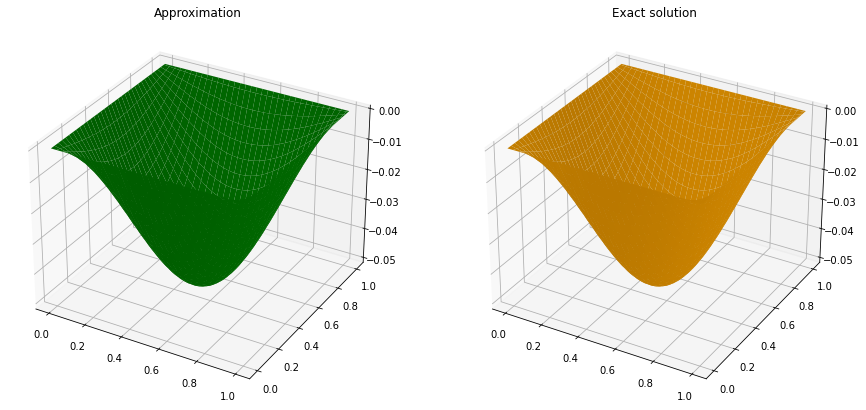

In [8]:
# Plot enforcing boundary conditions

# Manual insertion of the boundary conditions
U = np.zeros((n+2, n+2))
U[1:-1, 1:-1] = u

solut = np.zeros((n+2, n+2))
solut[1:-1, 1:-1] = sol(X, Y)

X, Y = np.meshgrid(partition, partition)

fig, (ax2, ax3) = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(15, 15))
ax2.plot_surface(X, Y, U, color='green')
ax2.set_title('Approximation')
ax3.plot_surface(X, Y, solut, color='orange')
ax3.set_title('Exact solution')
plt.savefig('e')
plt.show()

In [10]:
np.max(np.abs(U-solut))

4.166872291135049e-06